# Classification using Copilot

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv"
df = pd.read_csv(url) # df is short for dataframe

In [2]:
# Print the first 5 rows of the data
df.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


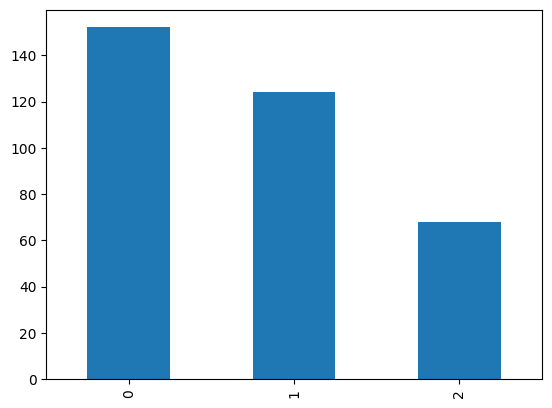

In [3]:
# let's visualize the distribution of the penguins species with a bar plot  in matplotlib
import matplotlib.pyplot as plt
df['Species'].value_counts().plot(kind='bar')
plt.show()

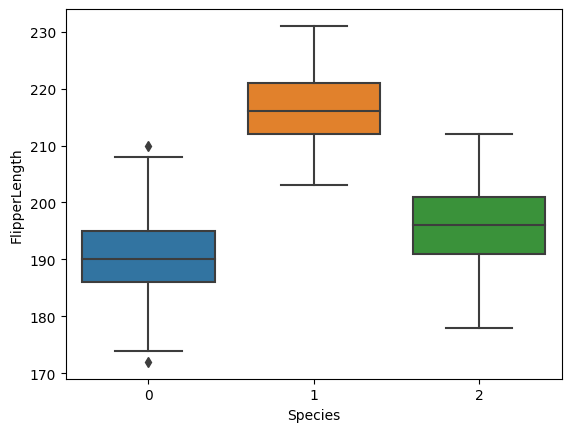

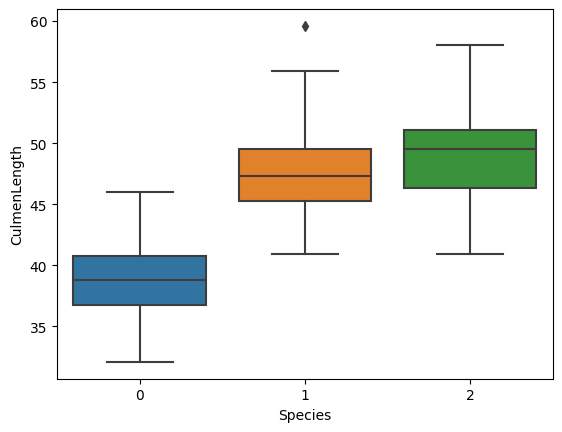

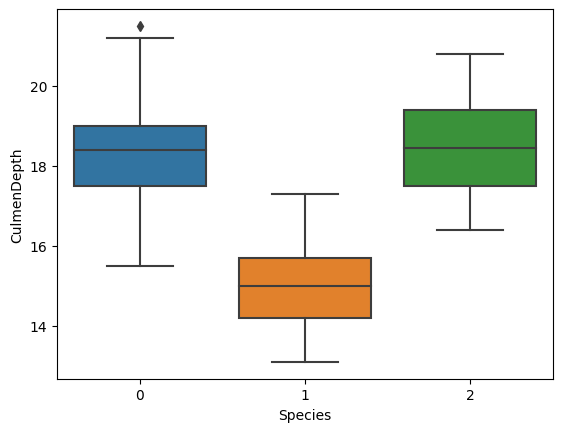

In [5]:
# Let's visualize with boxplots how the FlipperLength, CulmenLength and CulmenDepth are distributed for each species
# importing seaborn
import seaborn as sns
sns.boxplot(x='Species', y='FlipperLength', data=df)
plt.show()
sns.boxplot(x='Species', y='CulmenLength', data=df)
plt.show()
sns.boxplot(x='Species', y='CulmenDepth', data=df)
plt.show()

## Preparing the data

In [6]:
# show rows with missing values
df[df.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [7]:
# drop rows with missing values
df = df.dropna()

In [8]:
# Let's prepare for training:
# 1. Split the data into features and labels
# 2. Split the data into training and test sets

# Split the data into features and labels
# features are CulmenLength, CulmenDepth, FlipperLength
# labels are Species
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength']
label = 'Species'
X = df[features]
y = df[label]

In [9]:
# Split the data into training and test sets in a way to have 30% of the data for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3, random_state=42)

In [15]:
# Let's train a Logistic Regression model
# 1. Create a multiclass Logistic Regression model
# 2. Train the model

# Create a multiclass Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)


/home/vscode/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [16]:
# Let's evaluate the model
# 1. Predict the labels of the test set
# 2. Calculate the accuracy of the model

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9611650485436893